In [1]:
import matplotlib.pyplot as plt
import arviz as az
import pandas as pd
import numpy as np

In [2]:
az.style.use("arviz-grayscale")
plt.rcParams["figure.dpi"] = 300

In [14]:
co2_by_month = pd.read_csv("./data/co2-mm-mlo.csv")
co2_by_month["Date"] = pd.to_datetime(co2_by_month["Date"])
co2_by_month["CO2"] = co2_by_month["Average"].astype(np.float32)
co2_by_month = co2_by_month.drop(["Decimal Date", "Average", "Interpolated", "Trend", "Number of Days", "__parsed_extra"], axis=1)

co2_by_month.set_index("Date", drop=True, inplace=True)

num_forecast_steps = 12 * 10  # Forecast the final ten years, given previous data
co2_by_month_training_data = co2_by_month[:-num_forecast_steps]
co2_by_month_testing_data = co2_by_month[-num_forecast_steps:]

In [15]:
co2_by_month_training_data

,CO2
Date,
1958-03-01,315.709991
1958-04-01,317.450012
1958-05-01,317.510010
1958-06-01,317.269989
1958-07-01,315.869995
...,...
2014-09-01,395.540009
2014-10-01,396.160004
2014-11-01,397.399994


In [16]:
co2_by_month_testing_data

,CO2
Date,
2015-02-01,400.549988
2015-03-01,401.739990
2015-04-01,403.350006
2015-05-01,404.149994
2015-06-01,402.970001
...,...
2024-09-01,422.029999
2024-10-01,422.380005
2024-11-01,423.850006


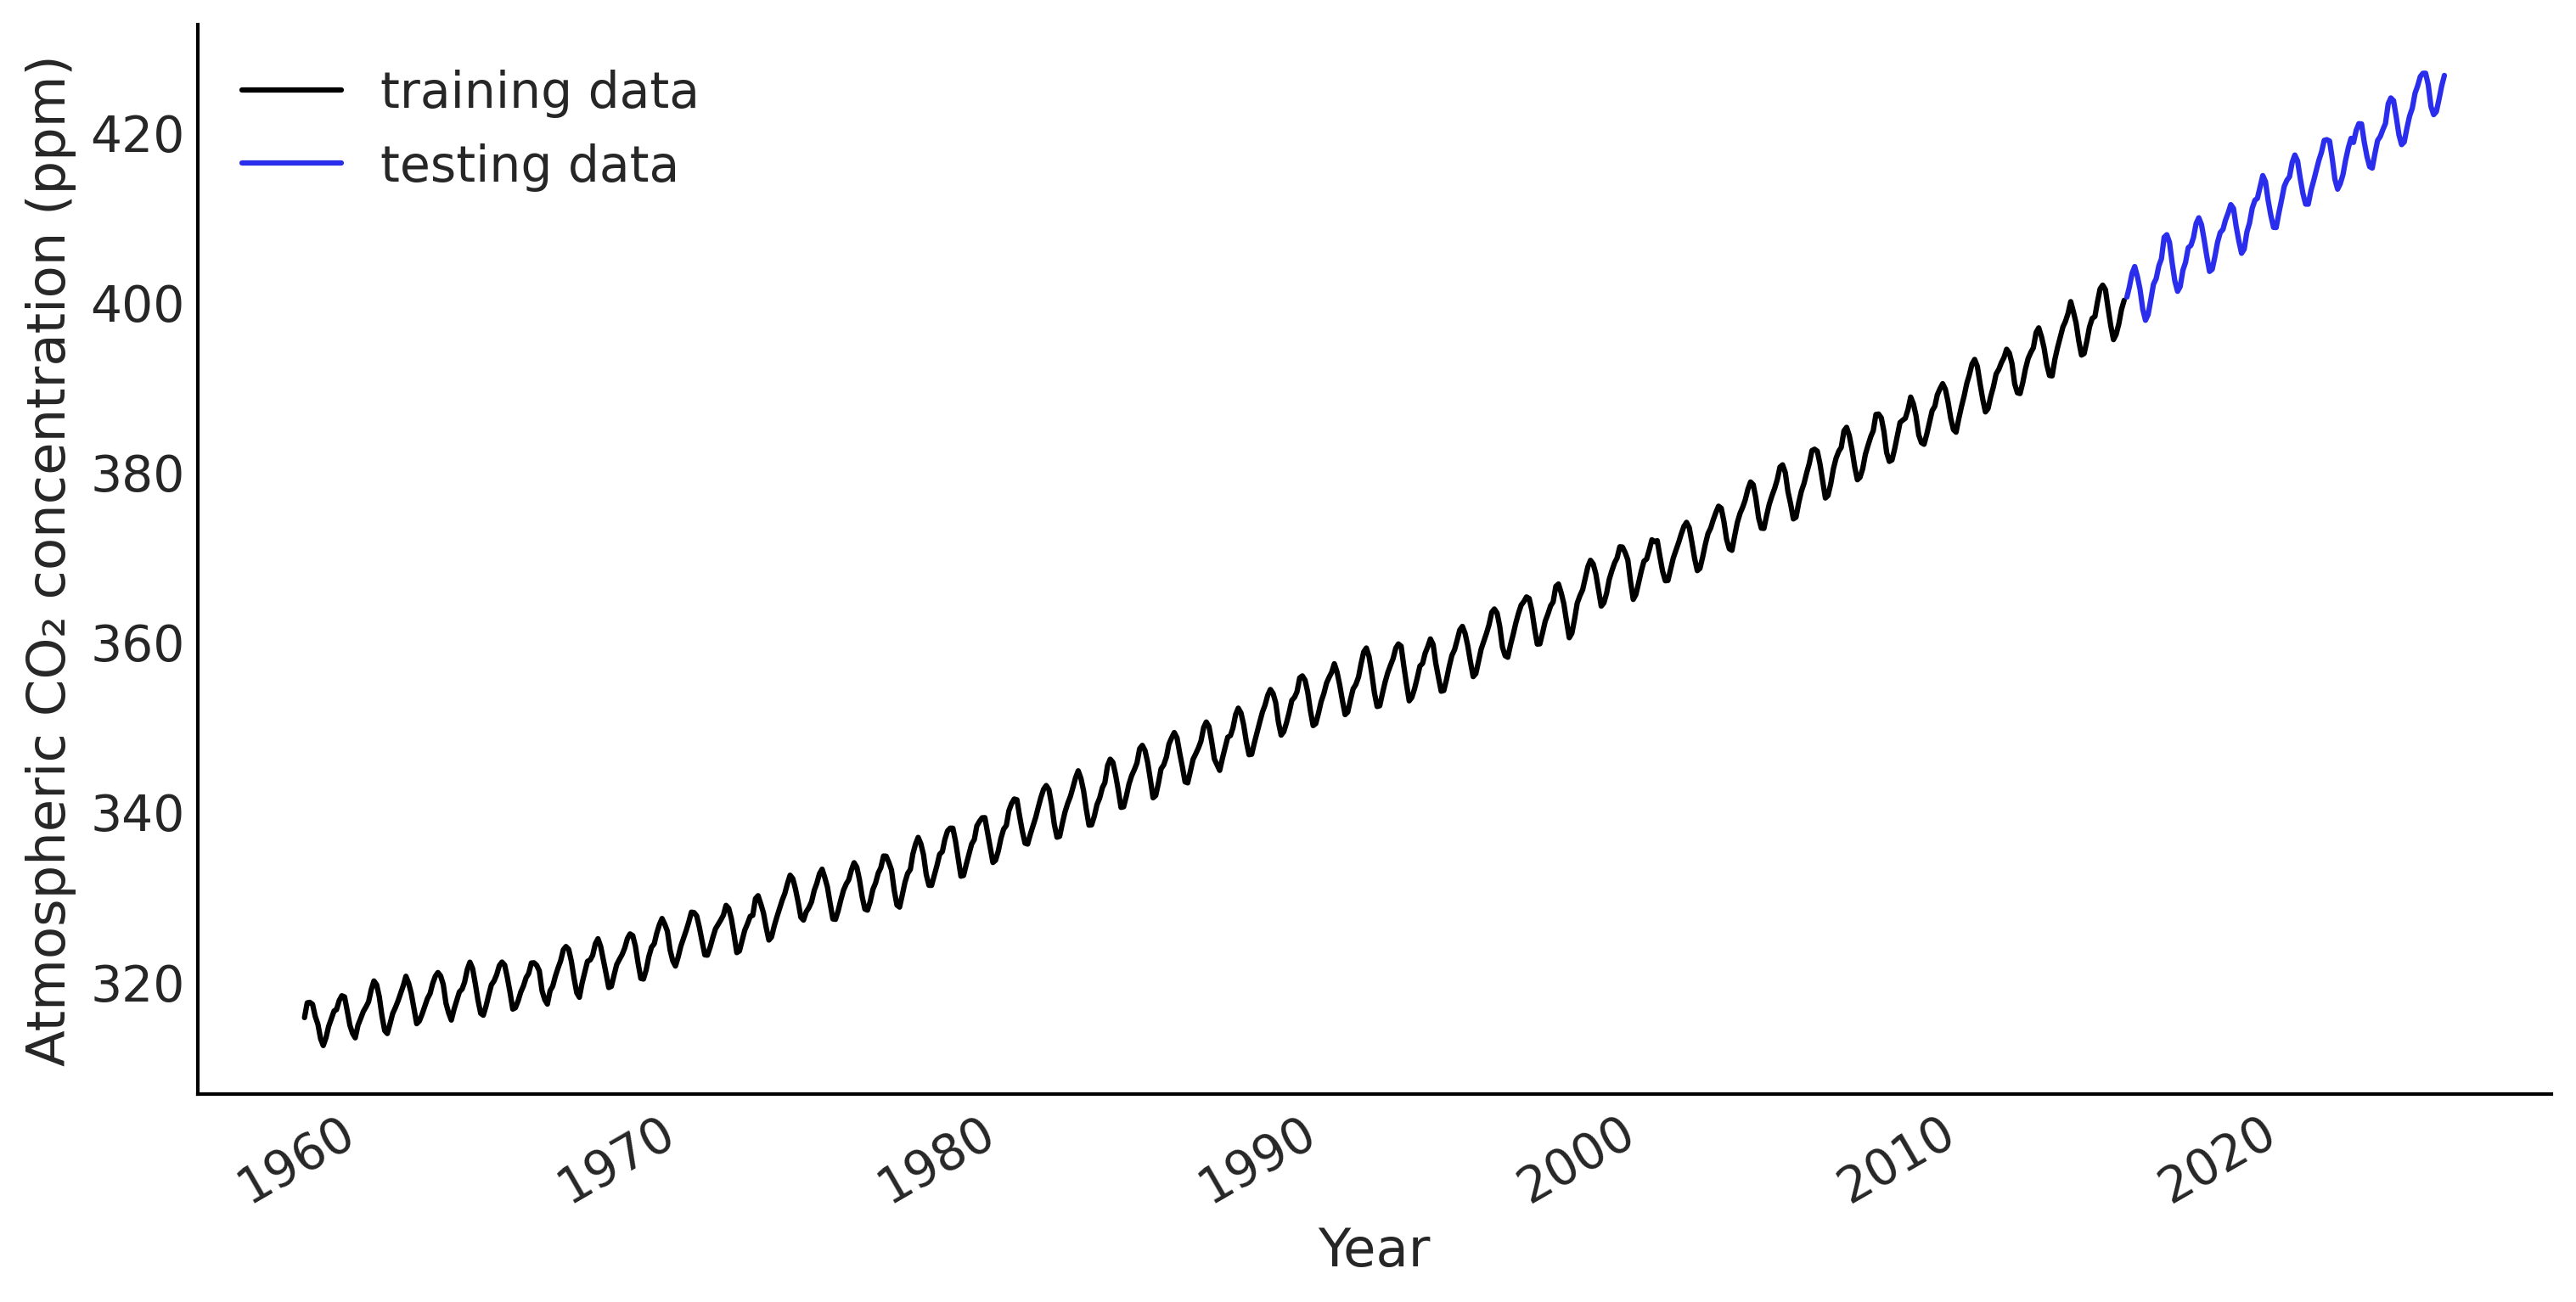

In [17]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.plot(co2_by_month_training_data, label="training data")
ax.plot(co2_by_month_testing_data, color="C4", label="testing data")
ax.legend()
ax.set(
    ylabel="Atmospheric CO₂ concentration (ppm)",
    xlabel="Year"
)
fig.autofmt_xdate()

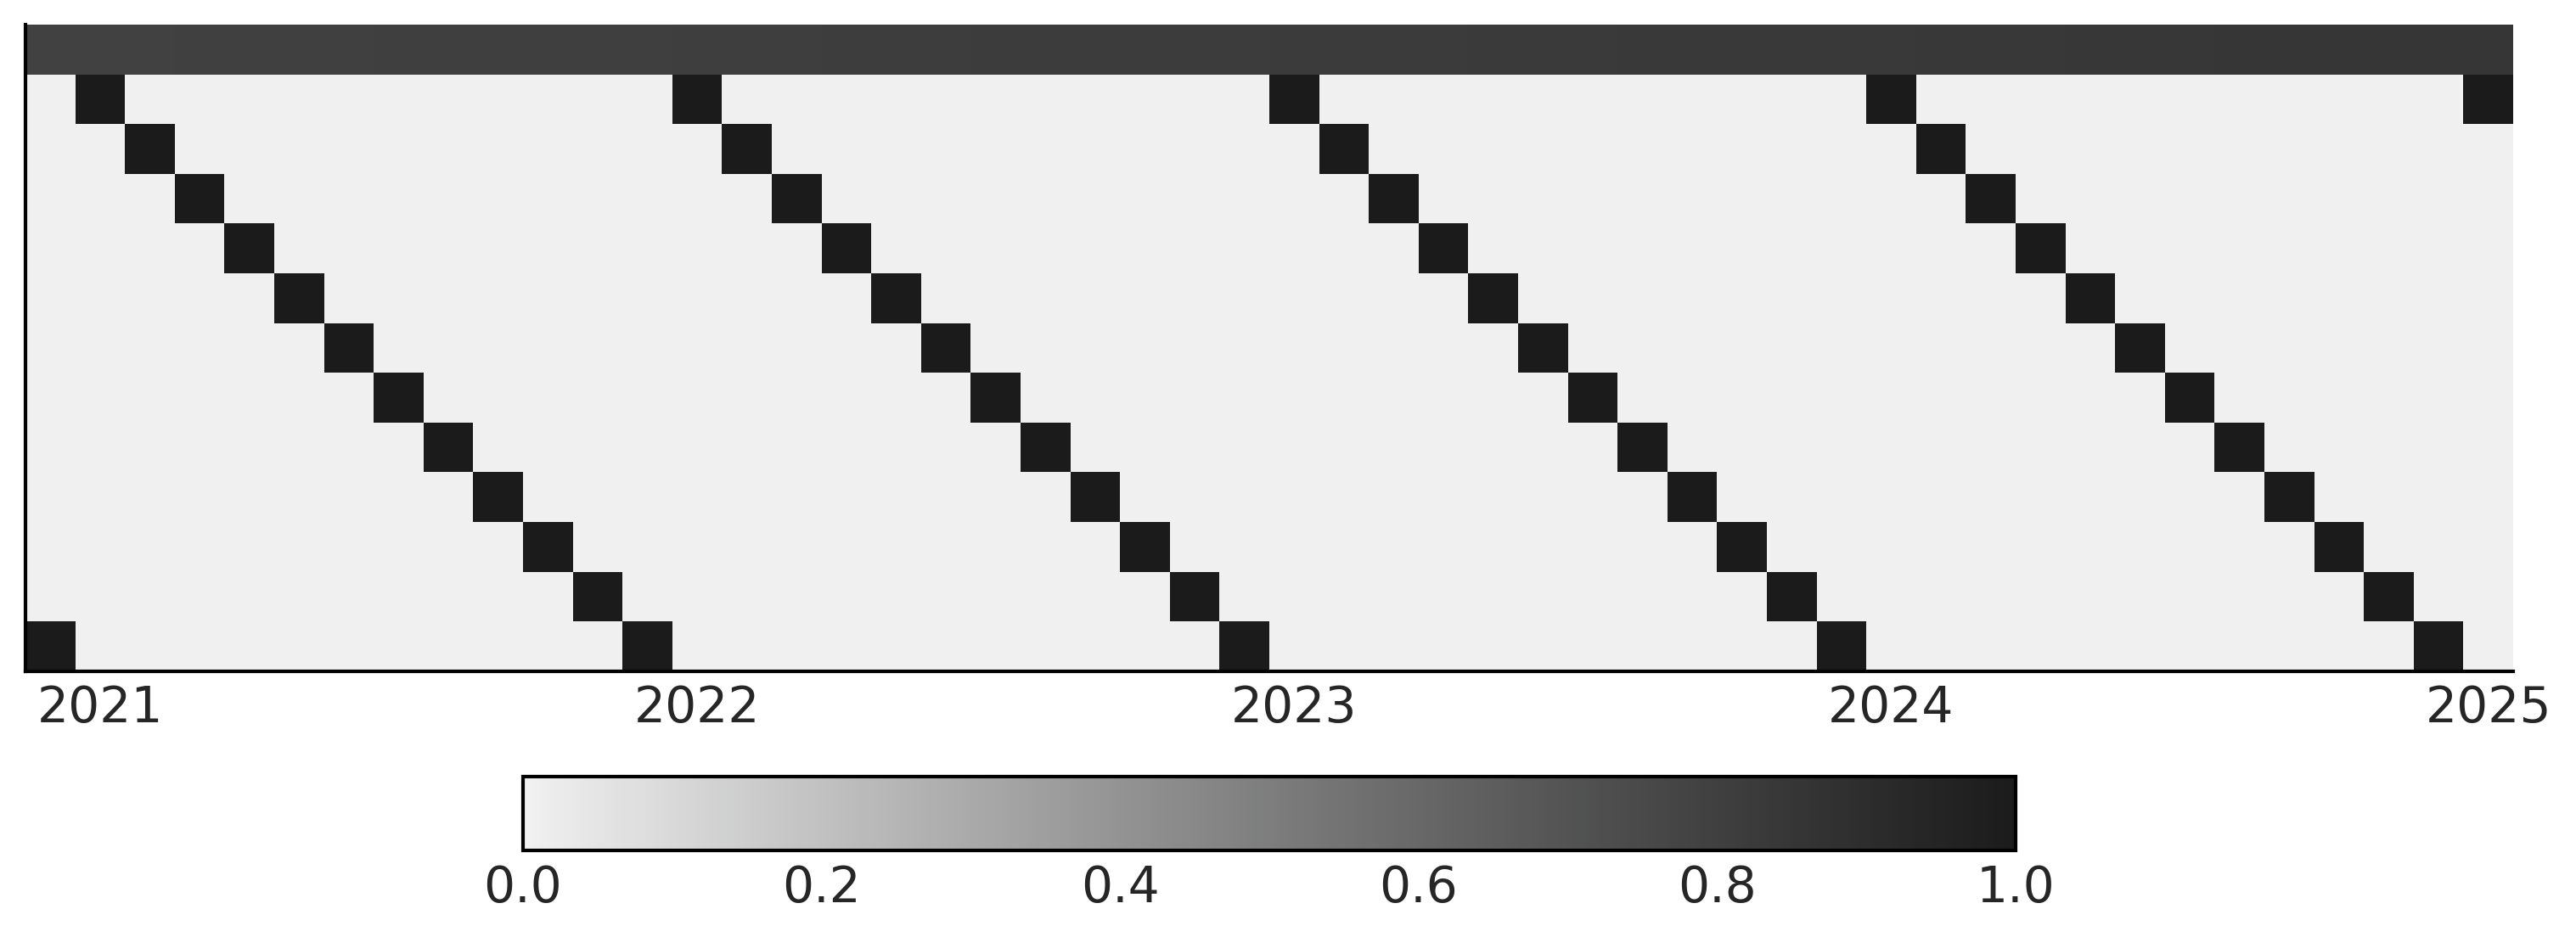

In [19]:
trend_all = np.linspace(0., 1., len(co2_by_month))[..., None]
trend_all = trend_all.astype(np.float32)
trend = trend_all[:-num_forecast_steps, :]

seasonality_all = pd.get_dummies(
   co2_by_month.index.month).values.astype(np.float32)
seasonality = seasonality_all[:-num_forecast_steps, :]

fig, ax = plt.subplots(figsize=(10, 4))
X_subset = np.concatenate([trend, seasonality], axis=-1)[-50:]
im = ax.imshow(X_subset.T, cmap="cet_gray_r")

label_loc = np.arange(1, 50, 12)
ax.set_xticks(label_loc)
ax.set_yticks([])
ax.set_xticklabels(co2_by_month.index.year[-50:][label_loc])
fig.colorbar(im, ax=ax, orientation="horizontal", shrink=.6)